In [1]:
import torch
from math import pi, e
from EquationAndDomain import OnePointInitialCondition, \
                              OneDimensionalMainEquation
from TrainerForNNEquationSolver import TrainerForNNEquationSolver
from utilities import nth_derivative
from ReportMaker import ReportMaker

\begin{equation}
u_{tt} + 0.2u_t + u = -0.2 exp(-t/5) cos(t) \\
u(0)=0 \\
u(1)= sin(1)*exp(-0.2) \\
t \in [0,1] \\
true\_solution = exp(-\frac{t}{5})*sin(t)
\end{equation}


Here:

NN - Neural network output for input x. unknown function u is approximated by an NN

In [2]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
    + 0.2 * nth_derivative(nn_model_value, x, 1)
    + nn_model_value
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 1.8596649169921875e-05
Valid max absolute error: 1.8656253814697266e-05
Mean average percentage error on train data: 0.0024116903077811003 %
Mean average percentage error on validation data: 0.002408557338640094 %


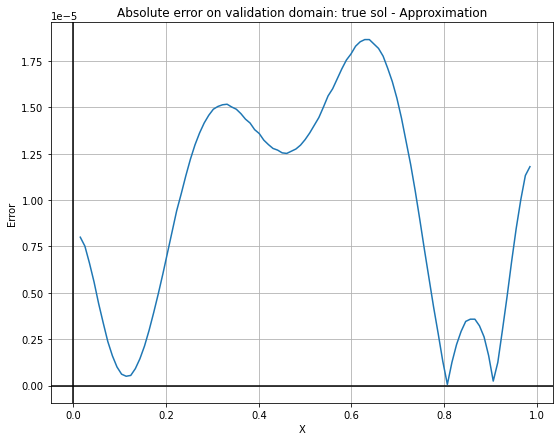

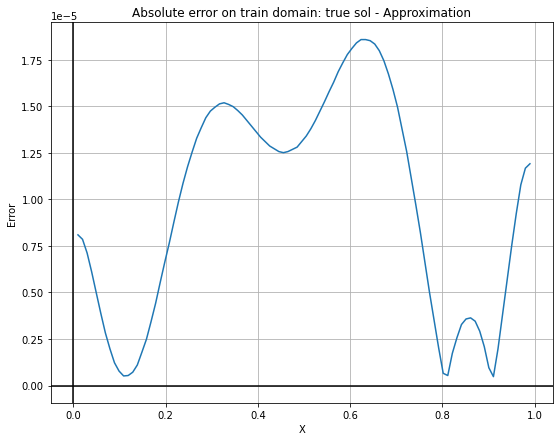

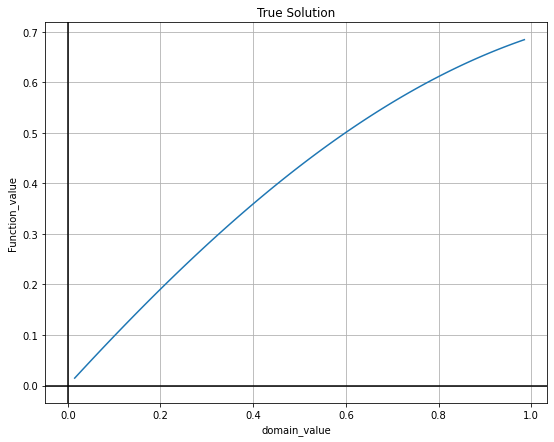

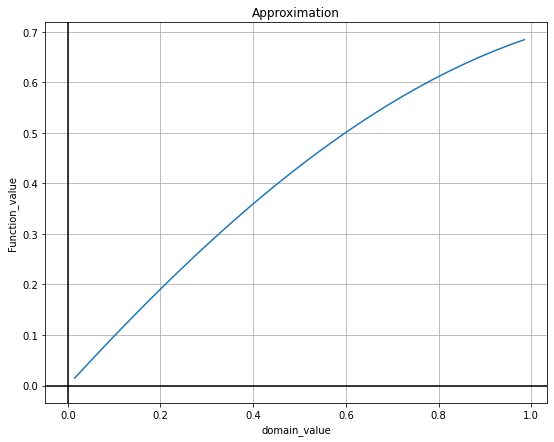

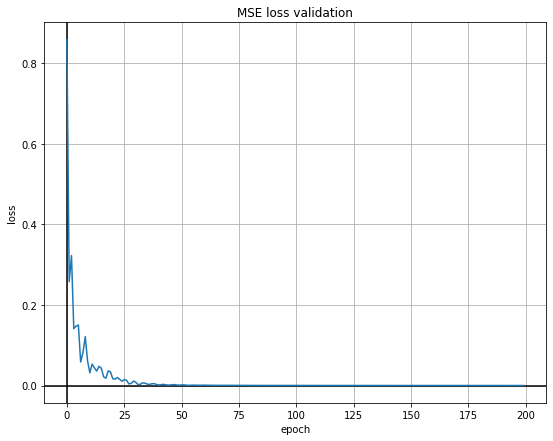

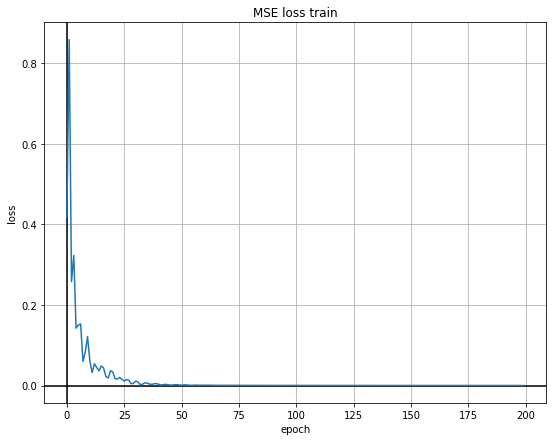

In [3]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) \\
u(0)=0 \\
u'(0)=1 \\
t \in [0,2] \\ 
true\_solution = exp(-\frac{t}{5})*sin(t)
\end{equation}

In [4]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.000841975212097168
Valid max absolute error: 0.0008419156074523926
Mean average percentage error on train data: 0.1331000179052353 %
Mean average percentage error on validation data: 0.13258260488510132 %


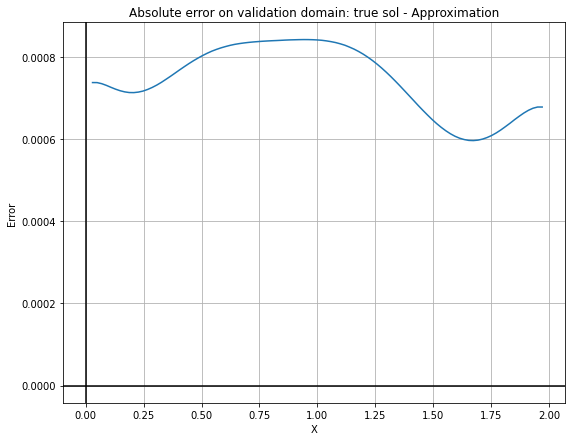

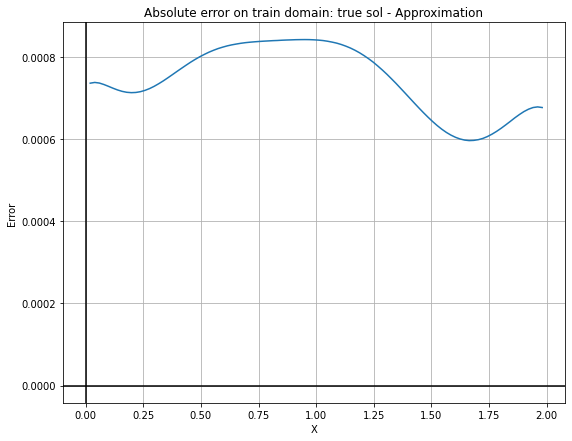

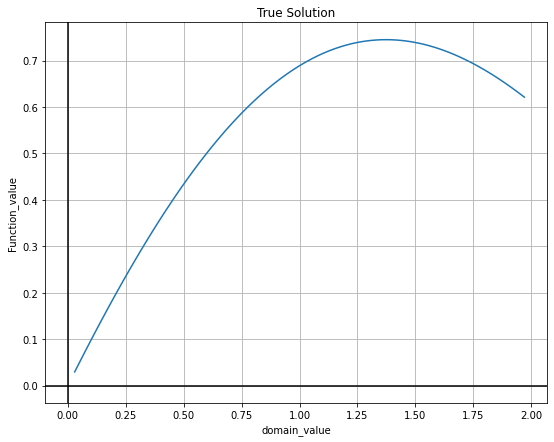

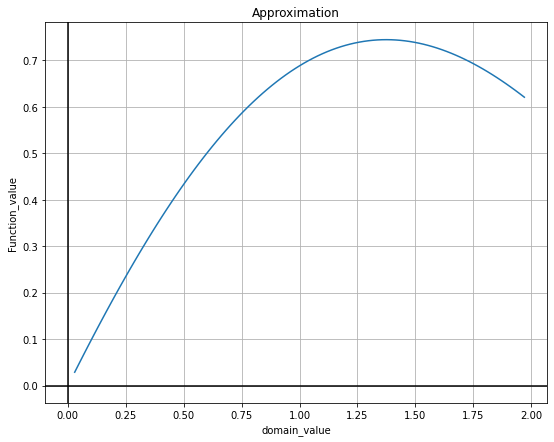

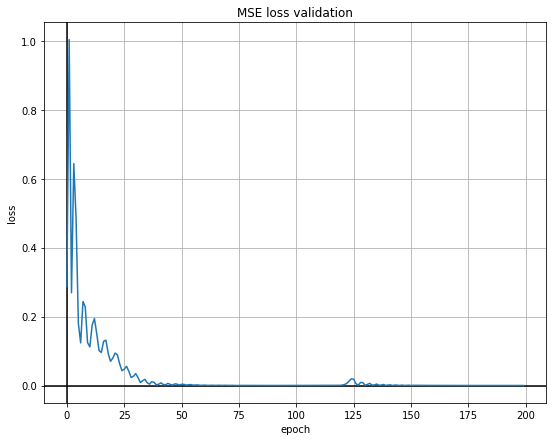

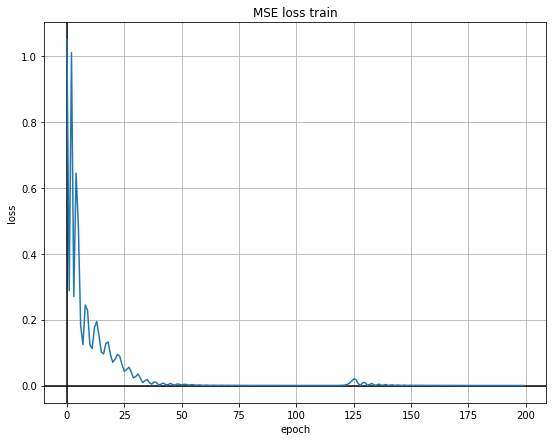

In [5]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u' + 0.2u = exp(- \frac{t}{5})cos(t) \\
u(0) = 0 \\
t \in [0,2] \\ 
true\_solution = exp(-\frac{t}{5})*sin(t)
\end{equation}

In [6]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.0008640885353088379
Valid max absolute error: 0.0008589550852775574
Mean average percentage error on train data: 0.07828816771507263 %
Mean average percentage error on validation data: 0.07846483588218689 %


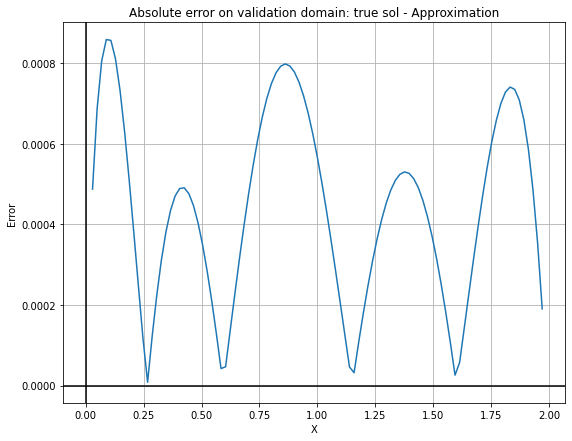

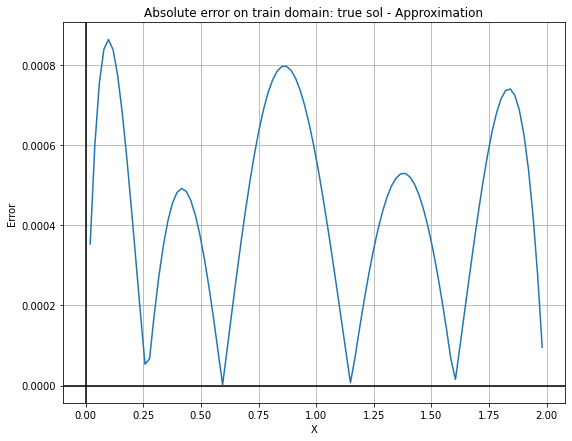

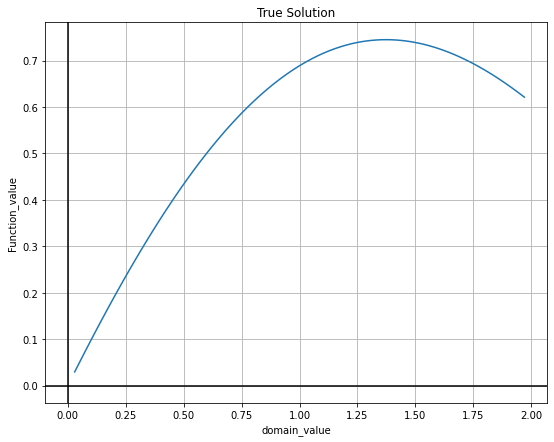

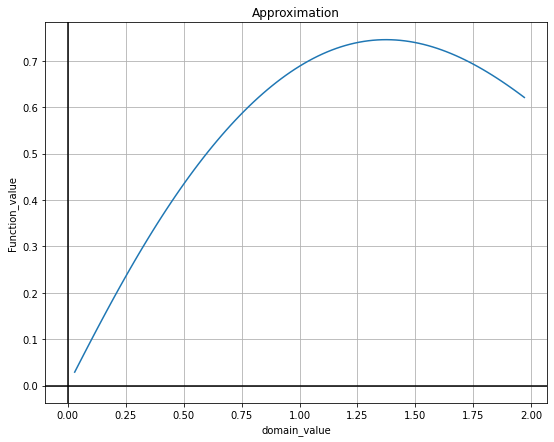

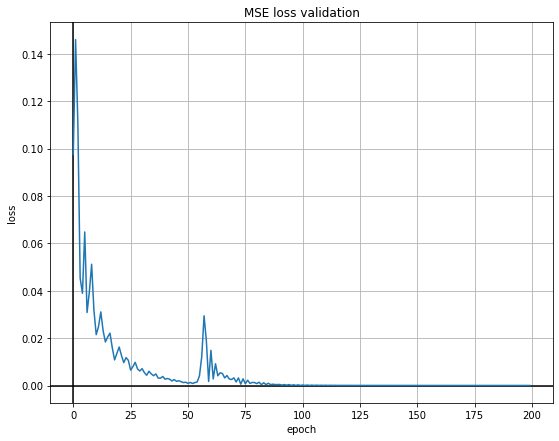

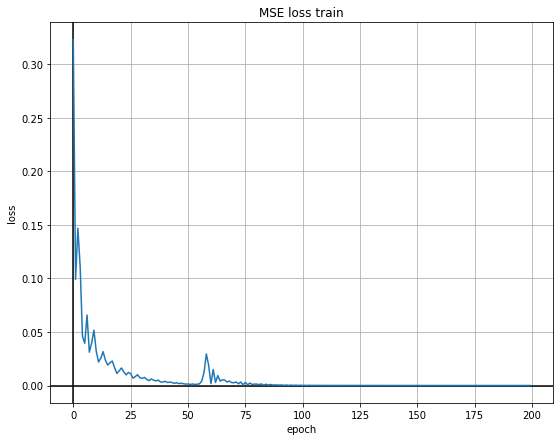

In [7]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u''+4u=cos(2t) \\
u(0)=1 \\
u'(0)=-1 \\
t \in [0,2] \\ 
true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t)
\end{equation}

In [8]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()


Train max absolute error: 0.0016331672668457031
Valid max absolute error: 0.0016325116157531738
Mean average percentage error on train data: 0.13142810761928558 %
Mean average percentage error on validation data: 0.1322306990623474 %


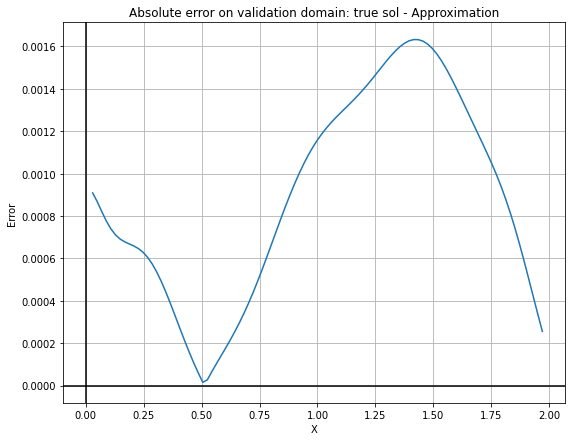

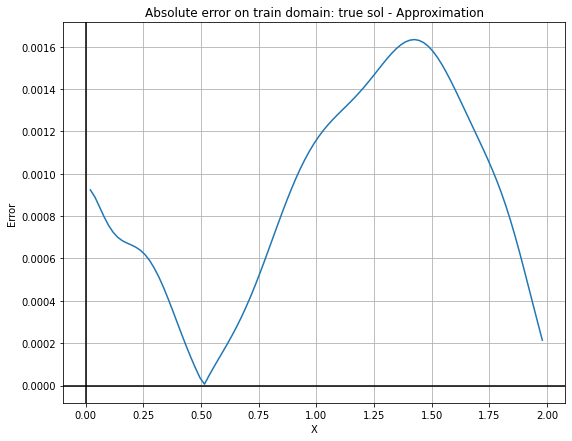

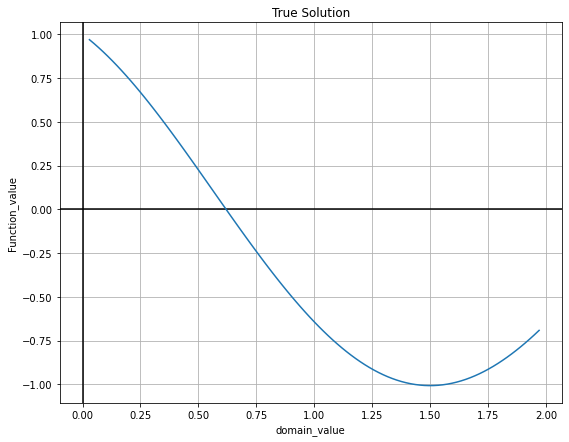

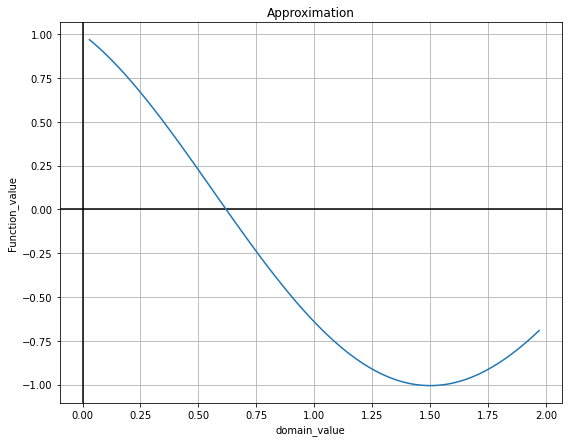

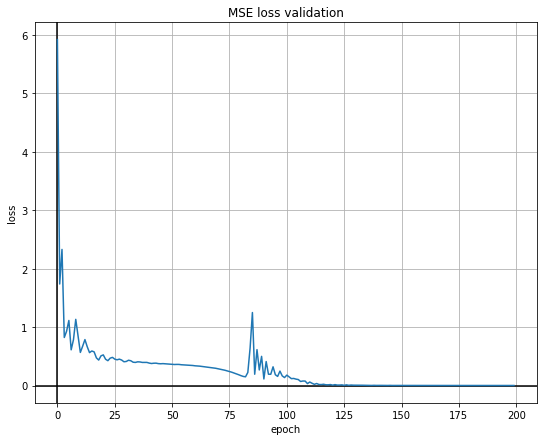

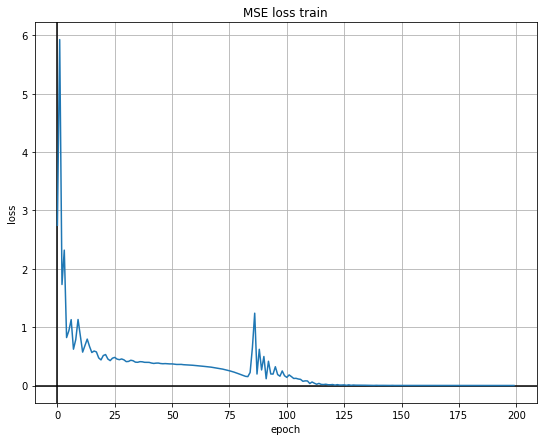

In [9]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u''' - 3u'' + 3u' -u = exp(t) \\
u(0)=1 \\
u'(0)=-1 \\
u''(0)=1 \\
t \in [0,1] \\ 
true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6)
\end{equation}

In [10]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: 
      nth_derivative(function, variable, 3)
    - torch.tensor([3.0],requires_grad=True) * nth_derivative(function, variable, 2)
    + torch.tensor([3.0],requires_grad=True) * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 3.0505313873291016
Valid max absolute error: 3.004931688308716
Mean average percentage error on train data: 105.19496154785156 %
Mean average percentage error on validation data: 105.23734283447266 %


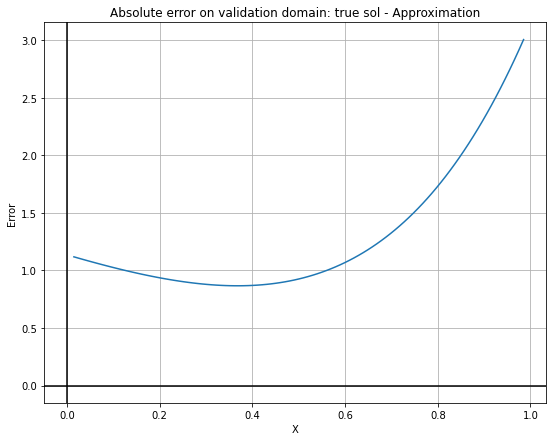

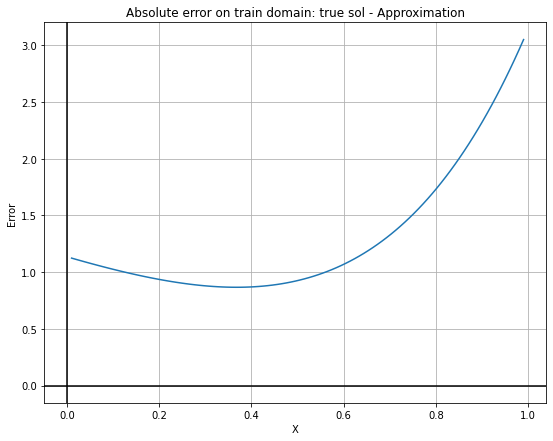

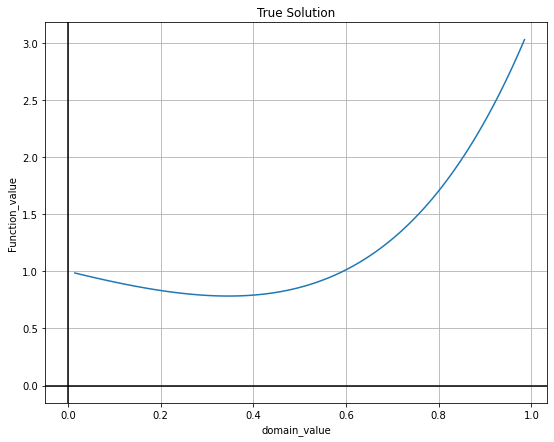

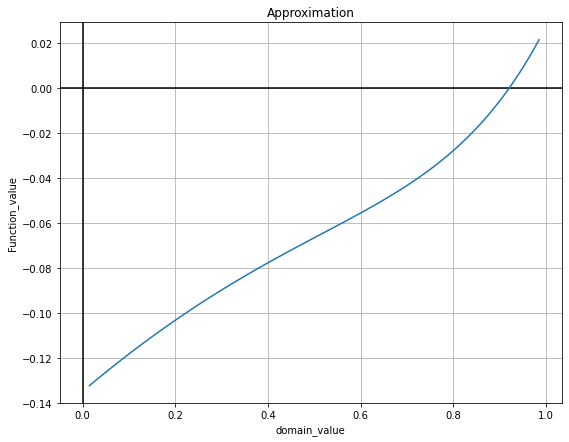

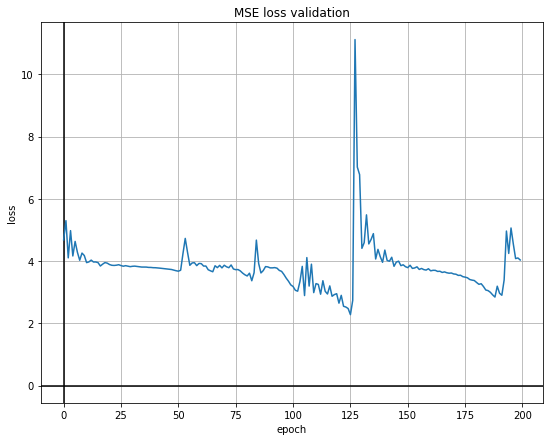

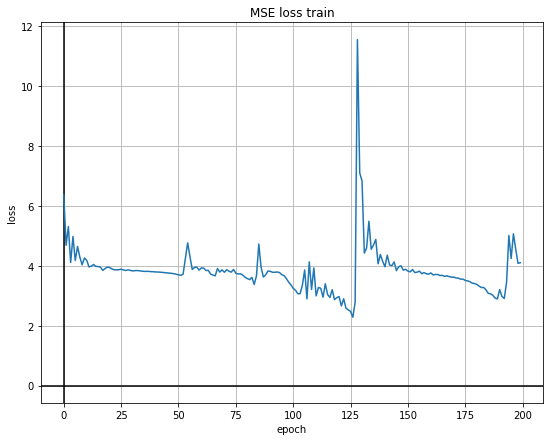

In [11]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u'' + u = -t \\
u(0)=0 \\
u(0)=0 \\
t \in [0,1] \\ 
true\_solution = \frac{sin(x)}{sin(1)} - t
\end{equation}

In [12]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    + variable
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 2.890452742576599e-05
Valid max absolute error: 2.88449227809906e-05
Mean average percentage error on train data: 0.030034372583031654 %
Mean average percentage error on validation data: 0.029927818104624748 %


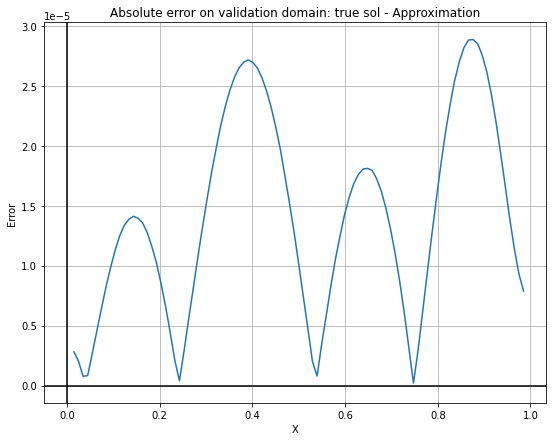

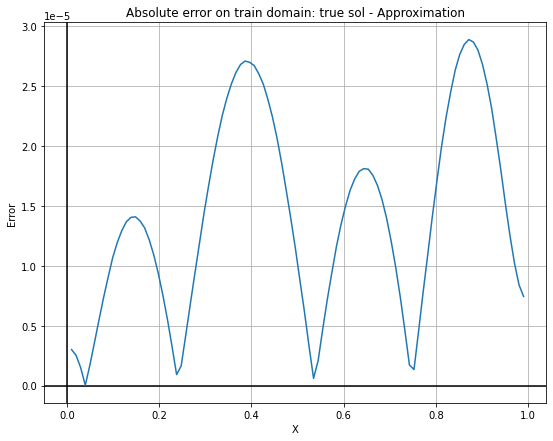

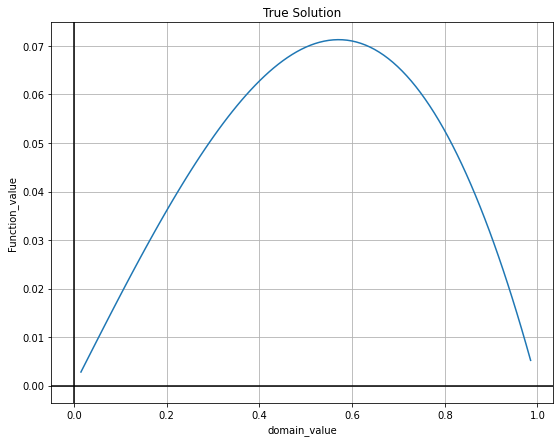

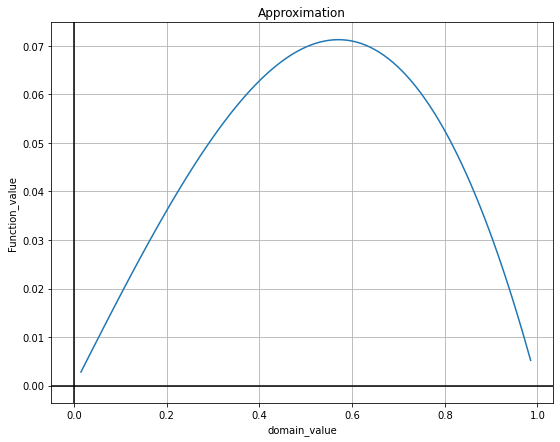

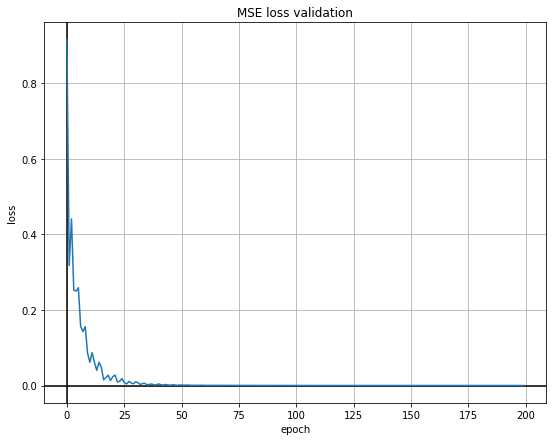

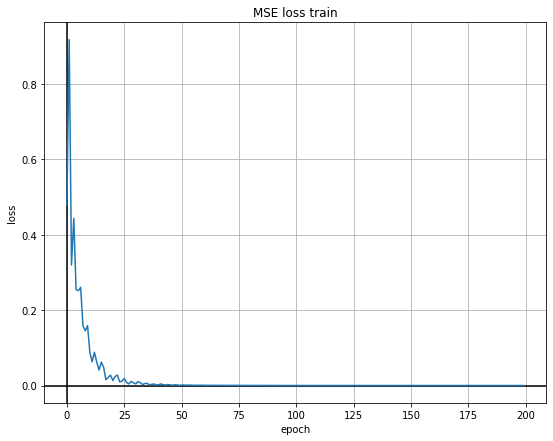

In [13]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u'' + u = 1 \\
u'(0)=0 \\
u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 \\
t \in [0,1] \\ 
true\_solution = 1 + cos(t)
\end{equation}

In [14]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    - 1
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - nth_derivative(nn_model_value,x,1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00027179718017578125
Valid max absolute error: 0.00027191638946533203
Mean average percentage error on train data: 0.007930969819426537 %
Mean average percentage error on validation data: 0.007880711928009987 %


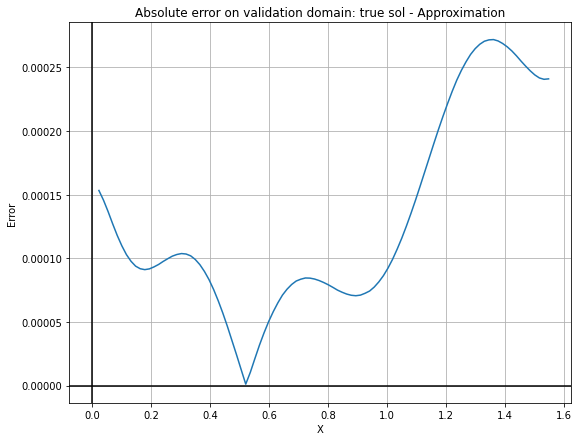

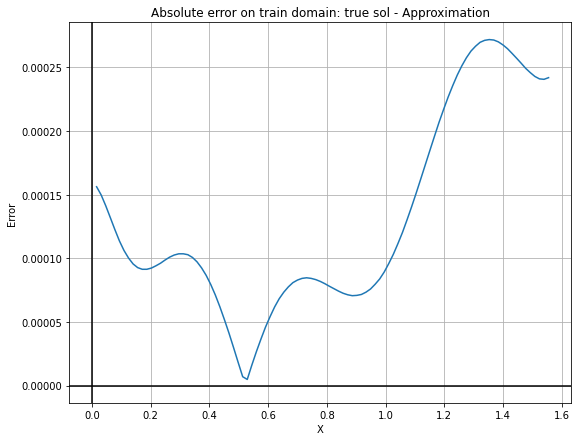

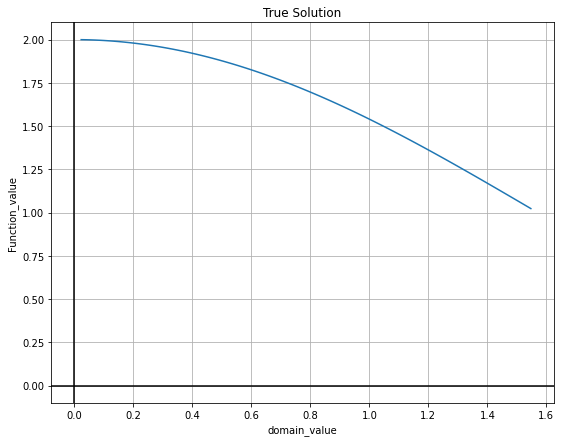

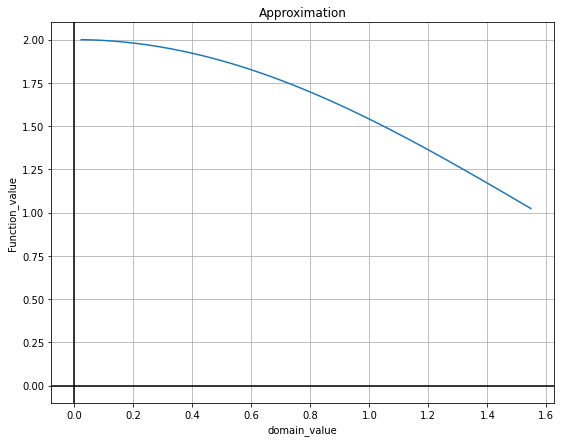

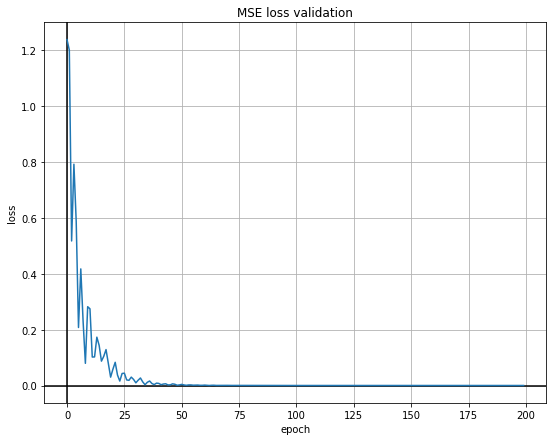

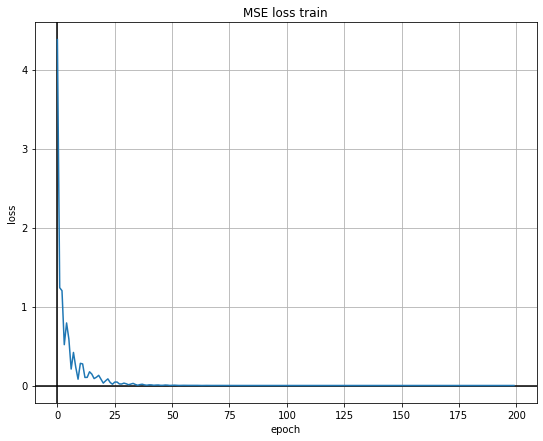

In [15]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u'' - u = 4exp(t) \\
u(0)=0 \\
u'(o)=1 \\
t \in [0,1] \\ 
true\_solution = 2t*exp(t) - sinh(t)
\end{equation}

In [16]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    - function
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00794219970703125
Valid max absolute error: 0.007918834686279297
Mean average percentage error on train data: 0.47345080971717834 %
Mean average percentage error on validation data: 0.47561702132225037 %


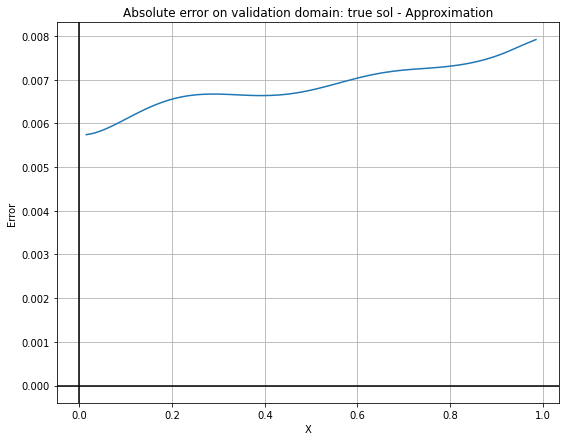

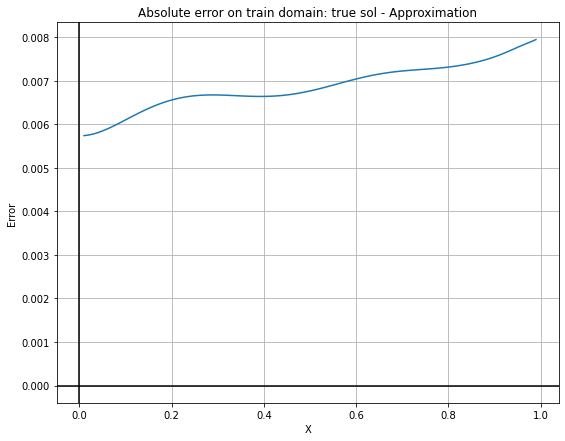

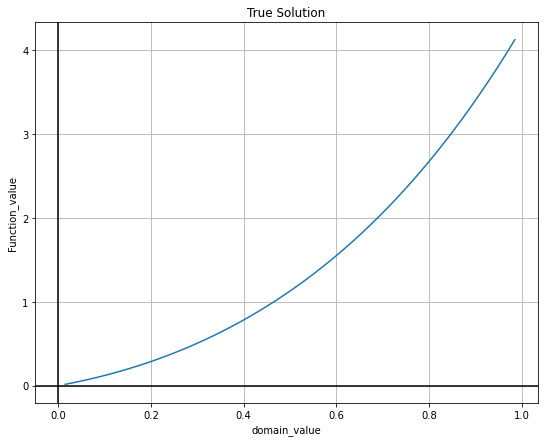

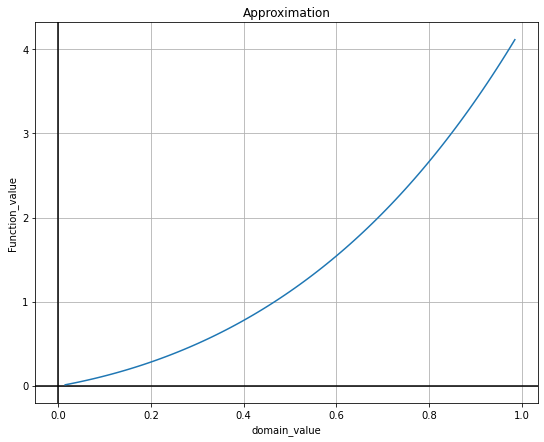

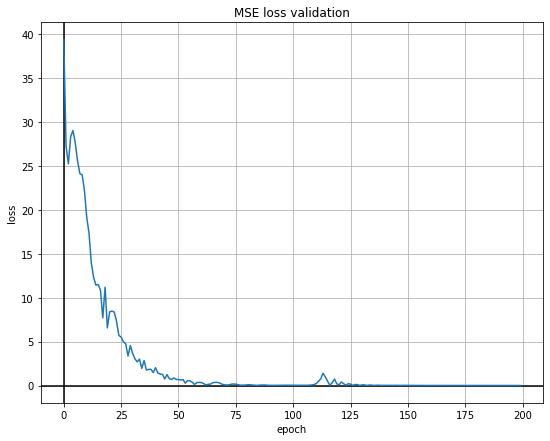

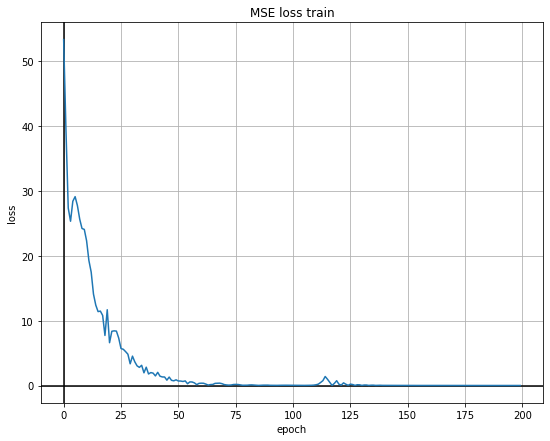

In [17]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
(1+t^2)u''-2tu = 0 \\
u(0)=0 \\
u'(0)=3 \\
t \in [0,1] \\ 
true\_solution = t^3 + 3*t
\end{equation}

In [18]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function, variable, 2)
    - 2 * variable * function
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([3.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.021767854690551758
Valid max absolute error: 0.020064592361450195
Mean average percentage error on train data: 0.6714368462562561 %
Mean average percentage error on validation data: 0.6678222417831421 %


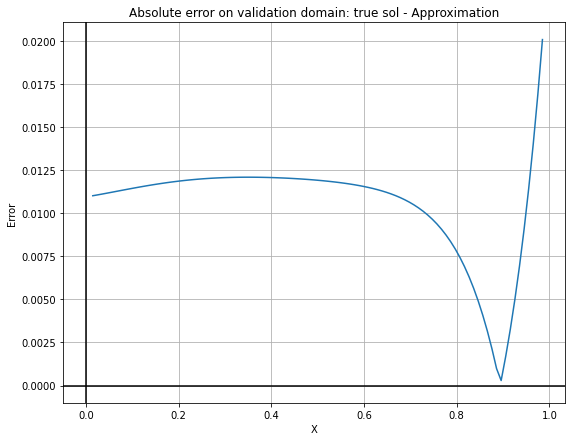

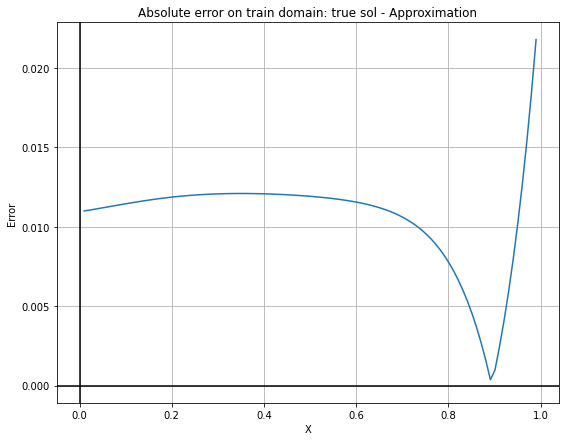

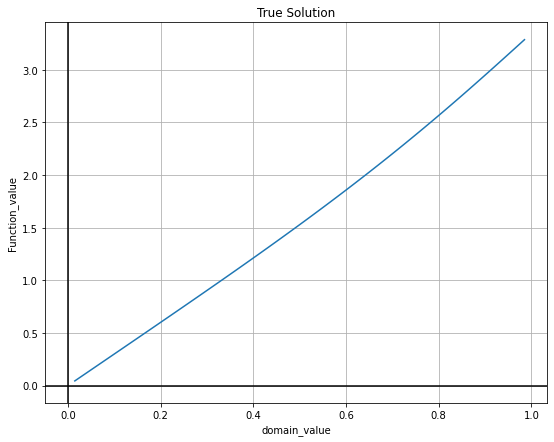

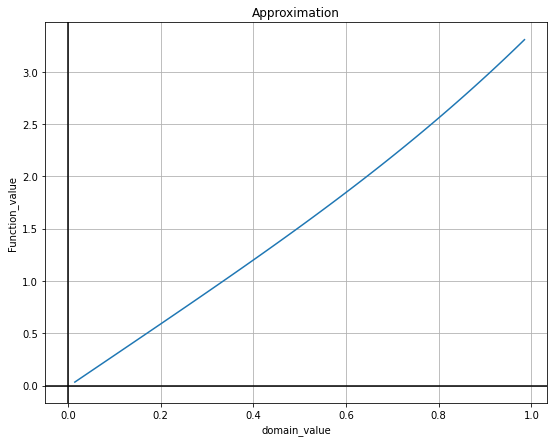

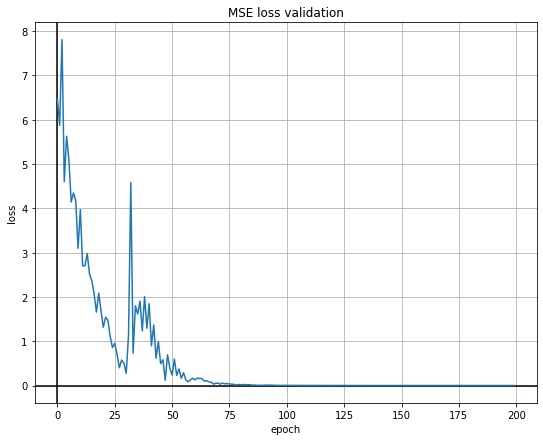

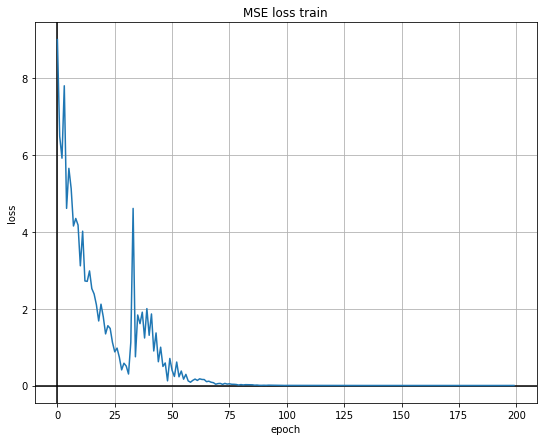

In [19]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u'''+ u'' = \frac{t-1}{t^2} \\
u(1) = \frac{1+e}{e} \\
u'(1) = -\frac{1+e}{e} \\
u''(1) = \frac{1-e}{e} \\ 
t \in [1,2] \\ 
true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t)
\end{equation}

In [20]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([(1+e)/e],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([(1-e)/e],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.001952052116394043
Valid max absolute error: 0.0019518733024597168
Mean average percentage error on train data: 0.29832515120506287 %
Mean average percentage error on validation data: 0.299201101064682 %


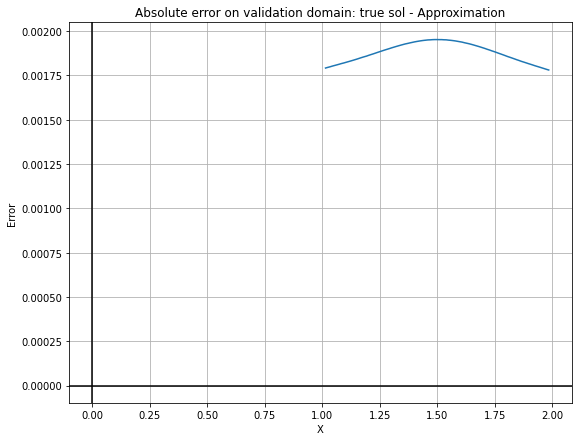

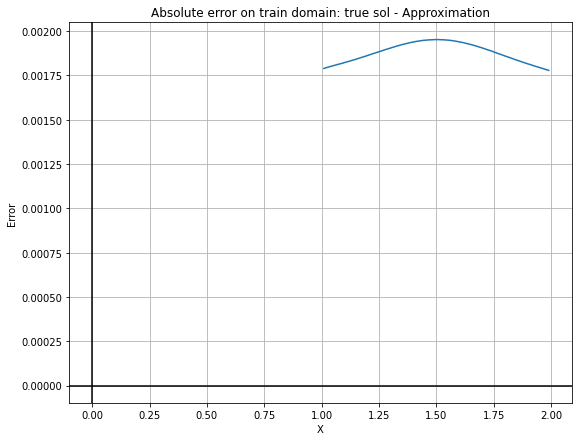

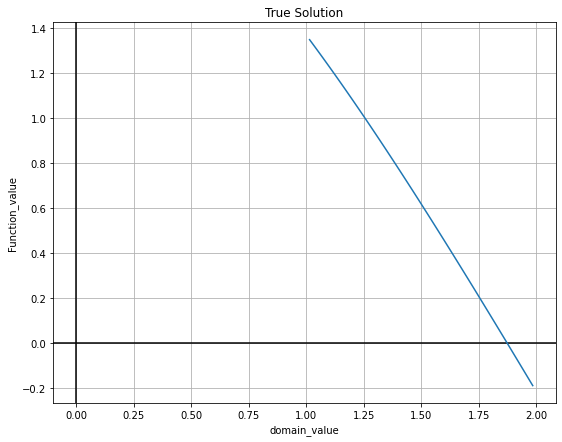

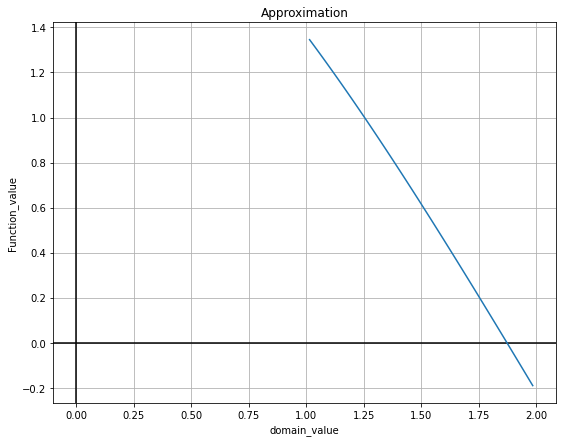

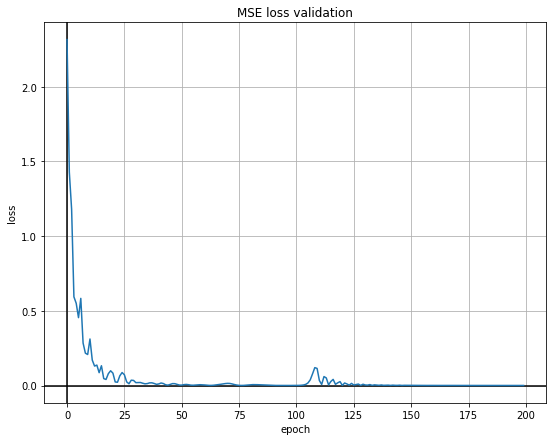

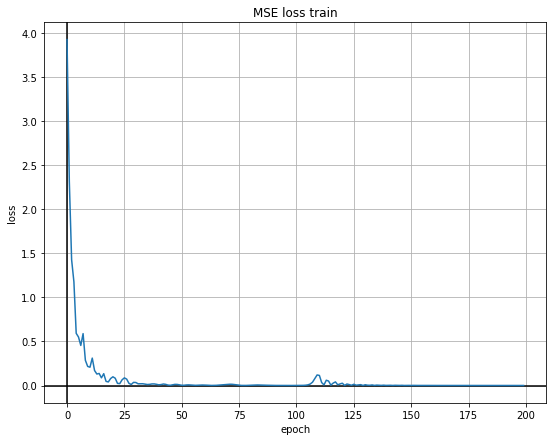

In [21]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} \\
u(0) = 1 \\
u'(0) = 0  \\
u''(0) = 0 \\ 
u'''(0) = 0 \\
t \in [0, 1] \\ 
true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t)
\end{equation}

In [22]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]

true_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.04320979118347168
Valid max absolute error: 0.04293620586395264
Mean average percentage error on train data: 2.229045867919922 %
Mean average percentage error on validation data: 2.2268316745758057 %


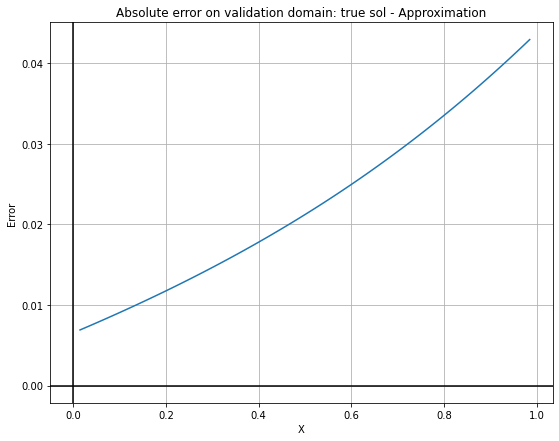

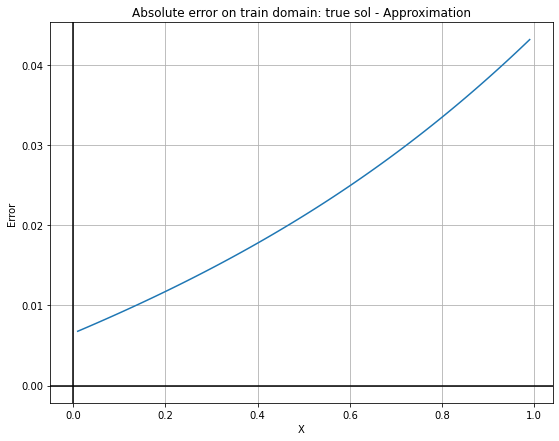

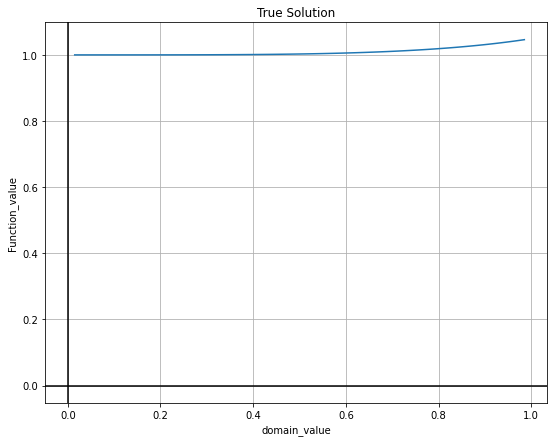

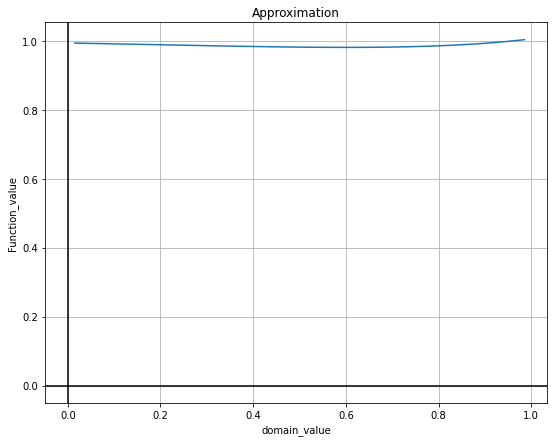

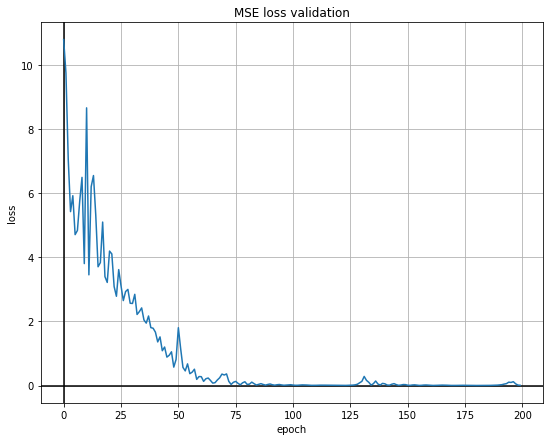

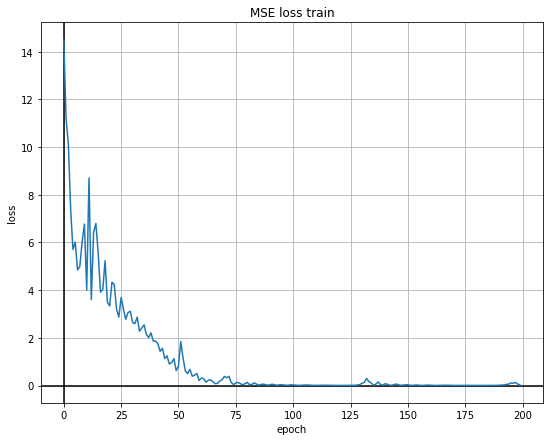

In [23]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()

\begin{equation}
u'''+ u' = t*sin(t) + 3*cos(t) \\
u(0) = 1 \\
u'(0) = 2  \\
u''(0) = 0 \\ 
t \in [0, 1] \\ 
true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4)
\end{equation}

In [24]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 100
main_eq = OneDimensionalMainEquation(
    left_bound, right_bound, n_points, main_eq_residual
)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
nn_ode_solver = TrainerForNNEquationSolver(main_eq, boundary_conditions)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

Train max absolute error: 0.00032258033752441406
Valid max absolute error: 0.00032019615173339844
Mean average percentage error on train data: 0.007988003082573414 %
Mean average percentage error on validation data: 0.007981648668646812 %


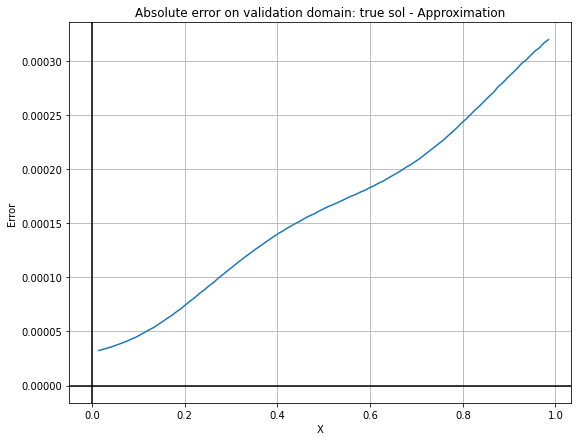

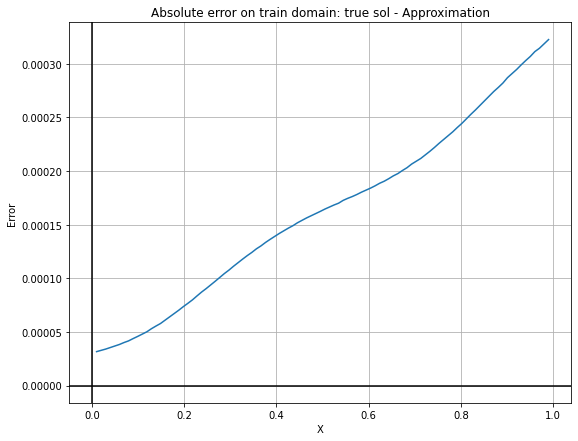

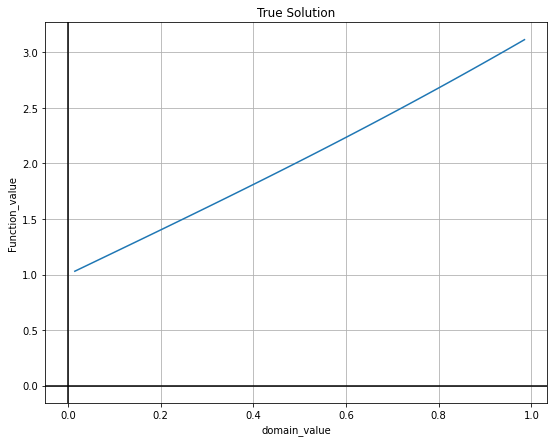

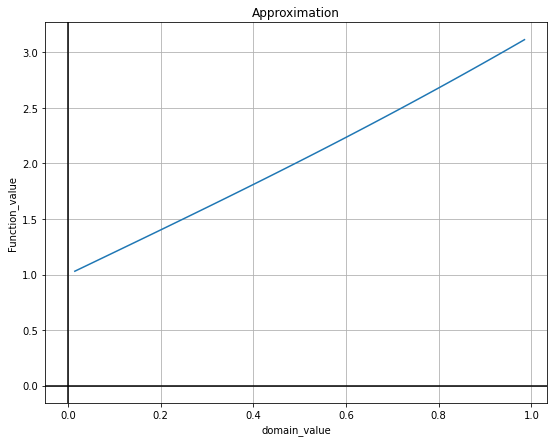

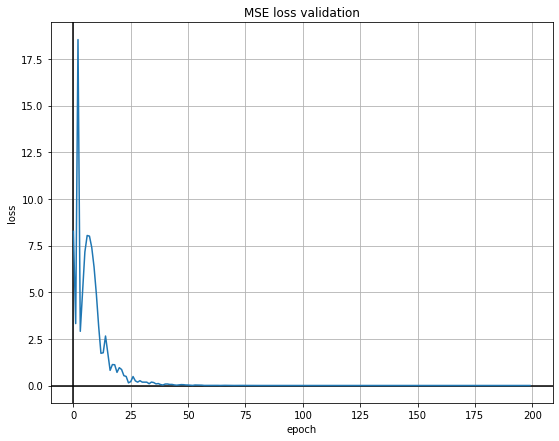

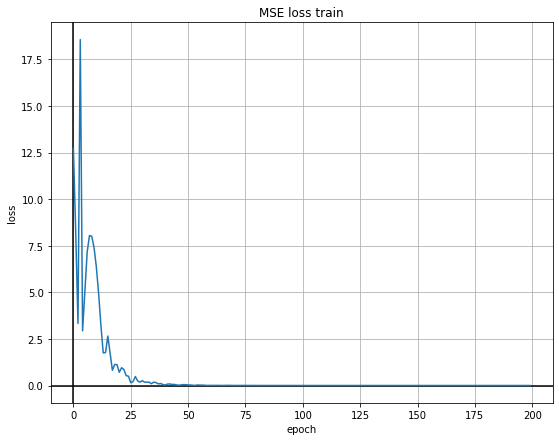

In [25]:
report = ReportMaker(true_solution, nn_model, main_eq, loss_train, loss_valid)
report.make_report()